In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
df = pd.read_csv('./daejeon_vds16.csv')
df.head()


,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


In [2]:

df.set_index('Date', inplace=True)


,Speed
Date,
2017-04-02 0:00,50.3
2017-04-02 0:05,58.9
2017-04-02 0:10,50.6
2017-04-02 0:15,50.9
2017-04-02 0:20,62.2


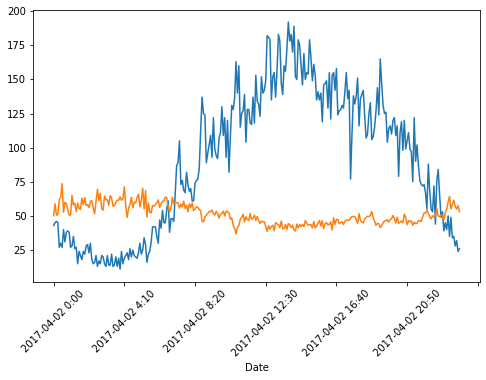

In [3]:

import matplotlib.pyplot as plt
df['ToVol'][:288].plot(rot=45,figsize=(8,5))
df['Speed'][:288].plot(rot=45,figsize=(8,5))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['ToVol', 'Occ.Rate']]
y = df[['Speed']]
y.head()


In [4]:

X2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X2.head()
inv_X = scaler.inverse_transform(X2)
print(inv_X[:5])
X.shape, y.shape


[[43.    1.9 ]
 [45.    1.84]
 [46.    1.87]
 [45.    1.72]
 [27.    1.12]]


((8064, 2), (8064, 1))

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.20, shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)


(6451, 2) (6451, 1)
(1613, 2) (1613, 1)


In [6]:

Acc = []

### A. 선형회귀(Linear Regression)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

#To retrieve the intercept and For retrieving the slope:
print(regressor.intercept_, regressor.coef_)
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 
                        'Predicted': y_pred.flatten()})


[59.06738099] [[-0.05815165 -0.53576153]]


In [7]:

from sklearn.metrics import r2_score
print("Accuracy score: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))


Accuracy score: 0.6440586227808973


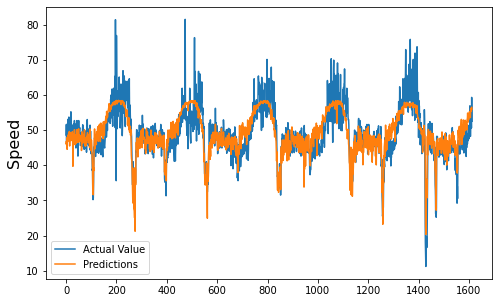

In [8]:

plt.figure(figsize=(8,5))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()


In [9]:

### B. 인공신경망_딥러닝 (DNN)
def reg_dnn(inp_dim):   
    model = Sequential()
    model.add(Dense(40, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))    
    model.compile(loss='mean_squared_error', optimizer='adam')    
    return model


In [10]:

model = reg_dnn(inp_dim=X_train.shape[1])            
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)


Epoch 1/30
162/162 [==============================] - 3s 7ms/step - loss: 1367.5375 - val_loss: 1003.9868
Epoch 2/30
162/162 [==============================] - 1s 6ms/step - loss: 863.5460 - val_loss: 941.1768
Epoch 3/30
162/162 [==============================] - 1s 6ms/step - loss: 786.9937 - val_loss: 838.0578
Epoch 4/30
162/162 [==============================] - 1s 6ms/step - loss: 671.6503 - val_loss: 659.0298
Epoch 5/30
162/162 [==============================] - 1s 6ms/step - loss: 464.2993 - val_loss: 365.9694
Epoch 6/30
162/162 [==============================] - 1s 6ms/step - loss: 201.3369 - val_loss: 103.1436
Epoch 7/30
162/162 [==============================] - 1s 7ms/step - loss: 56.3400 - val_loss: 33.3932
Epoch 8/30
162/162 [==============================] - 1s 6ms/step - loss: 27.3149 - val_loss: 24.4209
Epoch 9/30
162/162 [==============================] - 1s 6ms/step - loss: 23.0703 - val_loss: 19.1361
Epoch 10/30
162/162 [==============================] - 1s 8ms/step -

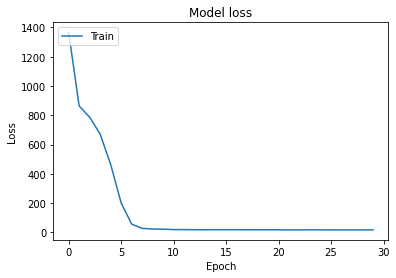

In [11]:

# 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [12]:

# Prediction
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 
                        'Predicted': y_pred.flatten()})
pred_df.head()


51/51 [==============================] - 0s 1ms/step


,Actual,Predicted
0,48.6,43.329937
1,51.6,44.896313
2,46.6,41.829823
3,50.9,46.641487
4,48.3,42.941586


Acc score : 0.6450943317814495


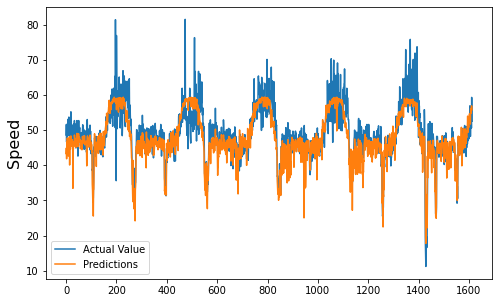

In [13]:

# Measure the Accuracy Score
from sklearn.metrics import r2_score
print("Acc score : {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()


In [14]:
### C. 1D CNN 회귀

In [15]:

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape, X_test.shape)

from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg_cnn():    
    model = Sequential()    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', 
                     input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))    
    model.add(Flatten())    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')    
    return model

(6451, 2, 1) (1613, 2, 1)


In [16]:


# Model Training
model = reg_cnn()
history = model.fit(X_train, y_train, 
                    epochs=30, validation_split=0.2)
# Prediction
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 
                        'Predicted': y_pred.flatten()})
pred_df.head()


Epoch 1/30
162/162 [==============================] - 4s 7ms/step - loss: 907.3260 - val_loss: 853.0181
Epoch 2/30
162/162 [==============================] - 1s 7ms/step - loss: 303.7040 - val_loss: 72.5854
Epoch 3/30
162/162 [==============================] - 1s 8ms/step - loss: 48.8159 - val_loss: 22.4605
Epoch 4/30
162/162 [==============================] - 1s 9ms/step - loss: 27.1908 - val_loss: 25.1925
Epoch 5/30
162/162 [==============================] - 2s 9ms/step - loss: 25.1997 - val_loss: 24.2927
Epoch 6/30
162/162 [==============================] - 2s 10ms/step - loss: 20.7826 - val_loss: 15.6810
Epoch 7/30
162/162 [==============================] - 1s 8ms/step - loss: 19.8100 - val_loss: 16.2961
Epoch 8/30
162/162 [==============================] - 1s 9ms/step - loss: 22.5644 - val_loss: 29.9688
Epoch 9/30
162/162 [==============================] - 2s 10ms/step - loss: 20.6350 - val_loss: 23.9226
Epoch 10/30
162/162 [==============================] - 2s 11ms/step - loss: 2

,Actual,Predicted
0,48.6,43.534176
1,51.6,44.686783
2,46.6,42.486679
3,50.9,47.810539
4,48.3,43.434631


Acc score: 0.7328485047270676


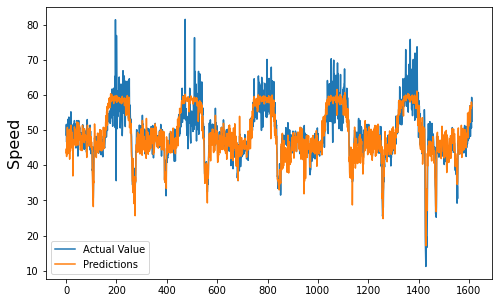

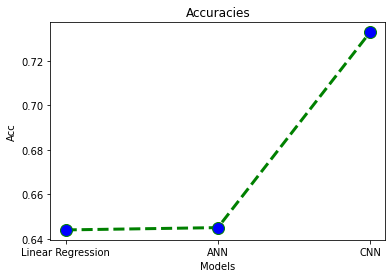

In [17]:

# Measure the Accuracy Score
from sklearn.metrics import r2_score
print("Acc score: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

plt.plot(range(3), Acc, color='green', 
         linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()


In [18]:
#@title 기본 제목 텍스트

# PART II.  기억(메모리) 길이를 고려하자. 


In [ ]:
Acc = []

8064


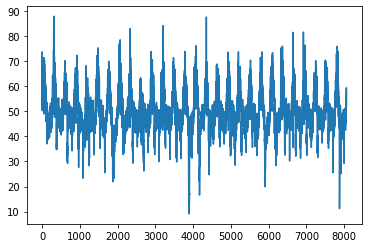

In [19]:

df.head()
spd=df.reset_index()['Speed']
spd.head()
print(len(spd))
plt.plot(spd)

In [20]:

windows = 60
X, y = [], []
for i in range(len(spd)-windows-1):
    X.append(spd[i:(i+windows)])
    y.append(spd[(i+windows)])

X = np.array(X)
y = np.array(y)
X.shape

X = np.array(X)
y = np.array(y)
X.shape
X[:3]
y[:3]

array([65.9, 56.7, 61.4])

In [21]:
# D. RNN으로 예측하자 : Many-to-One 문제로 접근
# windows={12, 24, 36, 48, 288}로 증가시키면서 RNN과 LSTM의 성능을 비교해보자

X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train_.shape, X_test_.shape) 


(6451, 2, 1) (1613, 2, 1)


In [22]:

from tensorflow.keras.layers import LSTM
from keras import metrics

def reg_lstm():
    model = Sequential()    
    model.add(LSTM(60, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(LSTM(60, return_sequences=True))
    model.add(LSTM(60 ))
    model.add(Dense(1))    
    model.compile(loss='mean_squared_error', optimizer='adam',
                  metrics =[metrics.mae])    
    return model

# (GPU 경고) LSTM의 기본은 tanh 활성함수를 사용한다. 
# 만일 LSTM 층에 activation='relu'를 사용하면 
# GPU를 이용한 가속 계산이 안된다는 경고문이 생긴다. 


In [23]:

# Model Training
model = reg_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 60)             14880     
                                                                 
 lstm_1 (LSTM)               (None, 2, 60)             29040     
                                                                 
 lstm_2 (LSTM)               (None, 60)                29040     
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [24]:

history = model.fit(X_train_, y_train, epochs=30, batch_size=16, validation_split=0.2)
# Prediction

Epoch 1/30
323/323 [==============================] - 10s 14ms/step - loss: 1075.9341 - mean_absolute_error: 30.8873 - val_loss: 533.5370 - val_mean_absolute_error: 21.7562
Epoch 2/30
323/323 [==============================] - 3s 8ms/step - loss: 286.4614 - mean_absolute_error: 15.0093 - val_loss: 163.3311 - val_mean_absolute_error: 10.7185
Epoch 3/30
323/323 [==============================] - 3s 8ms/step - loss: 100.9095 - mean_absolute_error: 7.7687 - val_loss: 78.5498 - val_mean_absolute_error: 6.7708
Epoch 4/30
323/323 [==============================] - 3s 8ms/step - loss: 68.2730 - mean_absolute_error: 6.0332 - val_loss: 65.4545 - val_mean_absolute_error: 6.2632
Epoch 5/30
323/323 [==============================] - 3s 10ms/step - loss: 64.9324 - mean_absolute_error: 5.9491 - val_loss: 63.8059 - val_mean_absolute_error: 6.2370
Epoch 6/30
323/323 [==============================] - 5s 14ms/step - loss: 64.7110 - mean_absolute_error: 5.9678 - val_loss: 63.4379 - val_mean_absolute_erro

In [25]:
y_pred = model.predict(X_test_)
y_pred
model.evaluate(X_test_, y_test)

51/51 [==============================] - 0s 4ms/step - loss: 17.2150 - mean_absolute_error: 3.0992


[17.215009689331055, 3.0991556644439697]

In [27]:

#inv_y= scaler3.inverse_transform(y)
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})

pred_df.head()

,Actual,Predicted
0,48.6,44.616638
1,51.6,45.714523
2,46.6,43.645775
3,50.9,47.018936
4,48.3,43.811256


Accuracy score of the predictions: 0.693086386999132


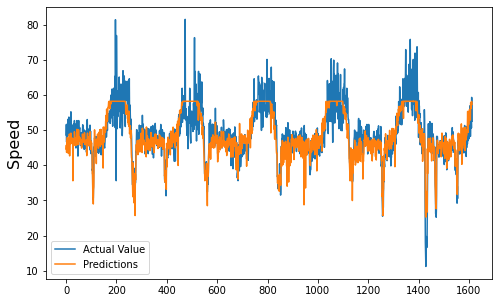

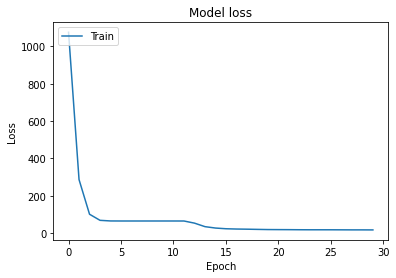

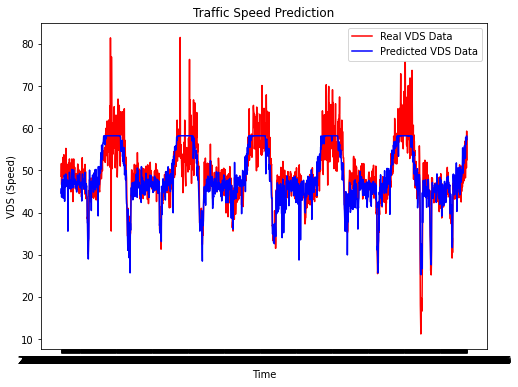

In [28]:

# Measure the Accuracy Score
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()
# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Visualising the results
plt.figure(figsize=(8,6))
plt.plot(y_test, color = 'red', label = 'Real VDS Data')
plt.plot(y_pred, color = 'blue', label = 'Predicted VDS Data')
plt.title('Traffic Speed Prediction')
plt.xlabel('Time')
plt.ylabel('VDS (Speed)')
plt.legend()
plt.show()

In [29]:
### E. ANN 모델 회귀
model = reg_dnn(inp_dim=X_train_.shape[1])
history = model.fit(X_train_, y_train, epochs=30, validation_split=0.2)
y_pred = model.predict(X_test)


Epoch 1/30
162/162 [==============================] - 2s 4ms/step - loss: 1251.5143 - val_loss: 1002.6352
Epoch 2/30
162/162 [==============================] - 1s 5ms/step - loss: 859.3365 - val_loss: 938.1460
Epoch 3/30
162/162 [==============================] - 1s 4ms/step - loss: 785.4691 - val_loss: 864.9655
Epoch 4/30
162/162 [==============================] - 1s 5ms/step - loss: 663.7273 - val_loss: 644.7682
Epoch 5/30
162/162 [==============================] - 1s 4ms/step - loss: 429.6140 - val_loss: 295.9627
Epoch 6/30
162/162 [==============================] - 1s 4ms/step - loss: 142.1844 - val_loss: 58.1355
Epoch 7/30
162/162 [==============================] - 1s 3ms/step - loss: 38.9852 - val_loss: 25.7218
Epoch 8/30
162/162 [==============================] - 1s 4ms/step - loss: 26.5300 - val_loss: 20.9008
Epoch 9/30
162/162 [==============================] - 1s 3ms/step - loss: 22.6296 - val_loss: 19.4490
Epoch 10/30
162/162 [==============================] - 1s 3ms/step - 

In [30]:

# Measure the Accuracy Score
from sklearn.metrics import r2_score 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))


Accuracy score of the predictions: 0.7118204759315541


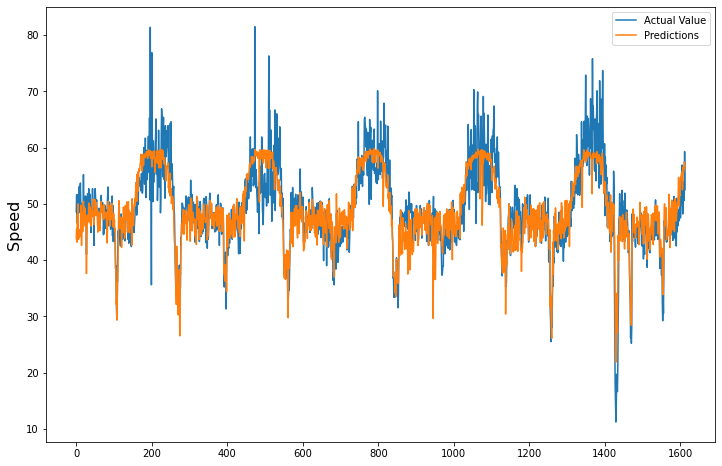

In [32]:
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 
                        'Predicted': y_pred.flatten()})
pred_df.head()

plt.figure(figsize=(12,8))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [33]:
def reg_cnn():    
    model = Sequential()    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', 
                     input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))    
    model.add(Flatten())    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')    
    return model


In [34]:
## CNN
model = reg_cnn()
model.fit(X_train_, y_train, epochs=30, validation_split=0.2)


Epoch 1/30
162/162 [==============================] - 3s 6ms/step - loss: 919.1061 - val_loss: 910.2478
Epoch 2/30
162/162 [==============================] - 1s 7ms/step - loss: 434.9143 - val_loss: 58.7997
Epoch 3/30
162/162 [==============================] - 1s 7ms/step - loss: 50.9792 - val_loss: 29.6139
Epoch 4/30
162/162 [==============================] - 1s 5ms/step - loss: 31.3172 - val_loss: 19.2527
Epoch 5/30
162/162 [==============================] - 1s 5ms/step - loss: 23.9201 - val_loss: 27.9507
Epoch 6/30
162/162 [==============================] - 1s 5ms/step - loss: 22.8019 - val_loss: 17.6296
Epoch 7/30
162/162 [==============================] - 1s 5ms/step - loss: 20.8436 - val_loss: 30.7088
Epoch 8/30
162/162 [==============================] - 1s 5ms/step - loss: 21.9414 - val_loss: 48.0229
Epoch 9/30
162/162 [==============================] - 1s 5ms/step - loss: 20.1591 - val_loss: 17.4989
Epoch 10/30
162/162 [==============================] - 1s 5ms/step - loss: 20.9

AttributeError: ignored

51/51 [==============================] - 0s 2ms/step
Accuracy score of the predictions: 0.6014707389660106


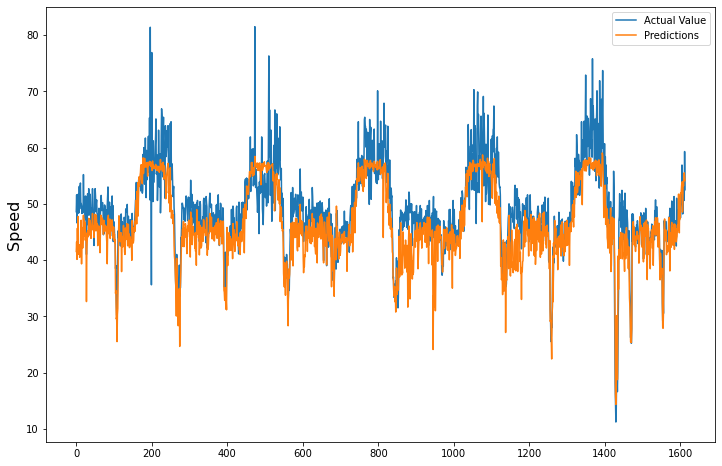

In [35]:

# Prediction
y_pred = model.predict(X_test_)
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 
                        'Predicted': y_pred.flatten()})
pred_df.head()

# Measure the Accuracy Score
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))

plt.figure(figsize=(12,8))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### G. Transformer 모델을 적용해보자

In [36]:
from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):    
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, 
                                  dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs   
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, 
                mlp_units, dropout=0, mlp_dropout=0):
    
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):  # This is what stacks our transformer blocks
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        
    outputs = layers.Dense(1, activation="linear")(x) #this is a pass-through
    return keras.Model(inputs, outputs)

def lr_scheduler(epoch, lr, warmup_epochs=30, decay_epochs=100, 
                 initial_lr=1e-6, base_lr=1e-3, min_lr=5e-5):
    if epoch <= warmup_epochs:
        pct = epoch / warmup_epochs
        return ((base_lr - initial_lr) * pct) + initial_lr

    if epoch > warmup_epochs and epoch < warmup_epochs+decay_epochs:
        pct = 1 - ((epoch - warmup_epochs) / decay_epochs)
        return ((base_lr - min_lr) * pct) + min_lr

    return min_lr

callbacks = [ tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            tf.keras.callbacks.LearningRateScheduler(lr_scheduler)      ]

input_shape = X_train_.shape[1:]
print(input_shape)

(2, 1)


In [37]:

model = build_model(input_shape, head_size=46,  num_heads=60,  ff_dim=55,  
                    num_transformer_blocks=5, mlp_units=[256], mlp_dropout=0.4, dropout=0.14, )
model.compile( loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["mean_squared_error"])

In [38]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 2, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 2, 1)        19321       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

In [39]:

history = model.fit( X_train_, y_train, validation_split=0.2, epochs=30, batch_size=20, callbacks=callbacks)


Epoch 1/30
258/258 [==============================] - 21s 25ms/step - loss: 1428.0787 - mean_squared_error: 1428.0787 - val_loss: 1447.1677 - val_mean_squared_error: 1447.1677 - lr: 1.0000e-06
Epoch 2/30
258/258 [==============================] - 5s 20ms/step - loss: 1102.0698 - mean_squared_error: 1102.0698 - val_loss: 919.7513 - val_mean_squared_error: 919.7513 - lr: 3.4300e-05
Epoch 3/30
258/258 [==============================] - 6s 22ms/step - loss: 738.1610 - mean_squared_error: 738.1609 - val_loss: 453.1103 - val_mean_squared_error: 453.1103 - lr: 6.7600e-05
Epoch 4/30
258/258 [==============================] - 5s 20ms/step - loss: 476.1608 - mean_squared_error: 476.1608 - val_loss: 163.9504 - val_mean_squared_error: 163.9504 - lr: 1.0090e-04
Epoch 5/30
258/258 [==============================] - 7s 26ms/step - loss: 347.3203 - mean_squared_error: 347.3203 - val_loss: 123.2685 - val_mean_squared_error: 123.2685 - lr: 1.3420e-04
Epoch 6/30
258/258 [==============================] -

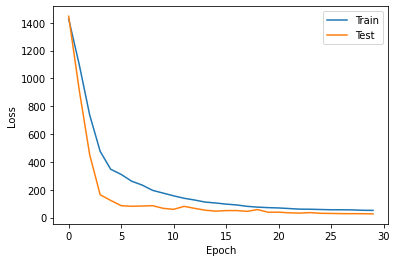

In [41]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


In [42]:

# Prediction
y_pred = model.predict(X_test_)
pred_df = pd.DataFrame({'Actual': y_test.values.flatten(), 
                        'Predicted': y_pred.flatten()})
pred_df.head()


51/51 [==============================] - 0s 8ms/step


,Actual,Predicted
0,48.6,45.023491
1,51.6,45.314266
2,46.6,44.929001
3,50.9,45.806854
4,48.3,43.609215


Accuracy score of the predictions: 0.5051134784622775


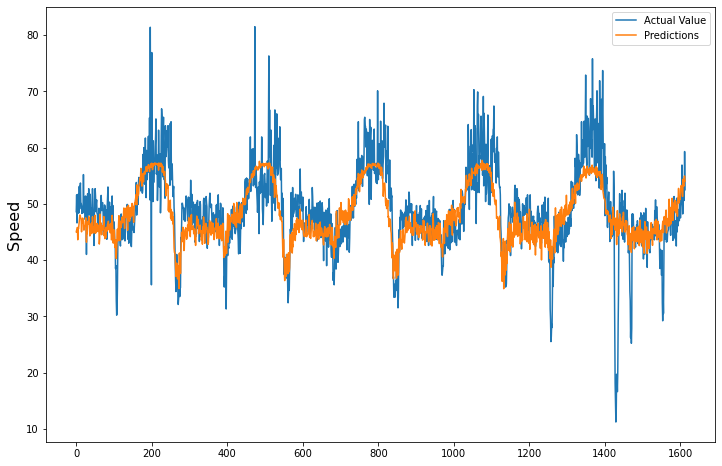

In [43]:

from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))
plt.figure(figsize=(12,8))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()


ValueError: ignored

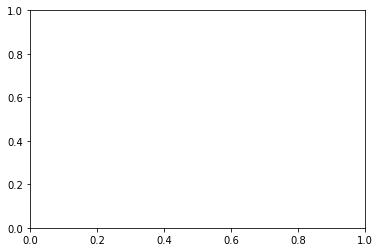

In [44]:

plt.plot(range(4), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(4), ['LSTM', 'ANN', 'CNN','Transformer'])
plt.show()

## 머신러닝의 러닝커브를 위한 함수를 정의하자

## (#) Deep Neural Network
- MLP와 ReLu를 활용한 신경망을 사용하자

# 5. 머신러닝 모델을 만들자

# (1) 연습문제 해보기 : 속도
- VDS 데이터의 라벨을 속도(Speed)에 대하여 자신의 라벨을 정의하시오
- 예 (20, 50) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (2) 연습문제 해보기 : 교통량
### 교통량(ToVol) 혹은 SmVol로 라벨을 정하는 방법을 적용하세요
- 예 (100, 300) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (3) 연습문제 해보기
- VDS 데이터의 라벨을 점유률(Occ.Rate)에 대하여 자신의 라벨을 정의하시오
- 예 (8, 16) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (4) 연습문제 해보기
- 머신러닝 방법과 DNN 방법을 비교하여 자장 휼룡한 신경망 방법과 하이퍼파라미터를 설정하세요.